# 1. IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet



In [ ]:
#Initizing plotly
import plotly.io as pio
pio.renderers.default = 'colab'

#2. Read_csv function from pandas


In [14]:
df=pd.read_csv("TSLA.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,868.191952,888.561551,845.794981,866.985375,866.985375,2.546814e+07
std,160.510480,165.062981,153.717128,159.428178,159.428178,9.007302e+06
min,623.849976,647.200012,620.460022,628.159973,628.159973,9.800600e+06
25%,723.480011,740.734985,708.889984,723.309998,723.309998,1.901000e+07
50%,851.450012,869.489990,825.159973,846.349976,846.349976,2.430100e+07
75%,1007.399994,1034.894959,984.920013,1009.825012,1009.825012,3.043895e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


# 3. Data visualisation using plotly express- visualising historical data

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.bar(df, y='Volume')

In [ ]:
px.box(df, y='Close')


# 4. Data preparation

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
1,2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000
2,2021-07-08,628.369995,654.429993,620.460022,652.809998,652.809998,22773300
3,2021-07-09,653.179993,658.909973,644.690002,656.950012,656.950012,18140500
4,2021-07-12,662.200012,687.239990,662.159973,685.700012,685.700012,25927000
...,...,...,...,...,...,...,...
246,2022-06-27,748.099976,756.210022,727.700012,734.760010,734.760010,29726100
247,2022-06-28,733.450012,749.909973,697.030029,697.989990,697.989990,30130400
248,2022-06-29,691.500000,693.520020,666.820007,685.469971,685.469971,27632400
249,2022-06-30,673.530029,688.369995,656.590027,673.419983,673.419983,31533500


In [15]:
# Creating new df with date and price column (Close is the Price and it is y , whereas, x is date)
columns= ['Date', 'Close']
new_stock_data_df= pd.DataFrame(df, columns=columns)
new_stock_data_df

,Date,Close
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


In [16]:
# Renaming dataframe columns as per the requirement of Facebook Prophet model
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


# 5. Creating Facebook Prophet Model

In [17]:
# Initializing and fitting prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ykplyz8/6updllzw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ykplyz8/piwifjql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=149', 'data', 'file=/tmp/tmp2ykplyz8/6updllzw.json', 'init=/tmp/tmp2ykplyz8/piwifjql.json', 'output', 'file=/tmp/tmp2ykplyz8/prophet_modeldobwyy2w/prophet_model-20250111120704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:07:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:07:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# 6. Model Prediction/Forecasting

In [18]:
# Here, model will do forecasting for 1 month as daily data is passed therefore,
# period=30 means, 30 days
future_data_prediction= model.make_future_dataframe(periods= 30)
forecast=model.predict(future_data_prediction)

In [19]:
forecast
# Here, yhat is the predicted value
# yhat_lower is the lower limit and yhat_upper is the upper limit

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-06,603.574659,482.099629,703.527825,603.574659,603.574659,-8.939252,-8.939252,-8.939252,-8.939252,-8.939252,-8.939252,0.0,0.0,0.0,594.635408
1,2021-07-07,606.689618,484.178682,710.714822,606.689618,606.689618,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,0.0,0.0,0.0,599.826121
2,2021-07-08,609.804577,486.117327,711.947967,609.804577,609.804577,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,0.0,0.0,0.0,594.487782
3,2021-07-09,612.919536,481.897185,710.156035,612.919536,612.919536,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,0.0,0.0,0.0,593.195724
4,2021-07-12,622.264413,505.803505,731.882077,622.264413,622.264413,-3.647595,-3.647595,-3.647595,-3.647595,-3.647595,-3.647595,0.0,0.0,0.0,618.616818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2022-07-27,611.462193,491.808268,712.009601,603.886411,618.881454,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,0.0,0.0,0.0,604.598696
277,2022-07-28,608.619249,485.512263,702.411704,600.471759,616.463588,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,0.0,0.0,0.0,593.302454
278,2022-07-29,605.776305,480.570675,701.187479,597.139384,614.204419,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,0.0,0.0,0.0,586.052493
279,2022-07-30,602.933362,519.347536,741.281211,593.745561,611.863109,27.245446,27.245446,27.245446,27.245446,27.245446,27.245446,0.0,0.0,0.0,630.178807


In [ ]:
px.line(forecast, x='ds', y='yhat')

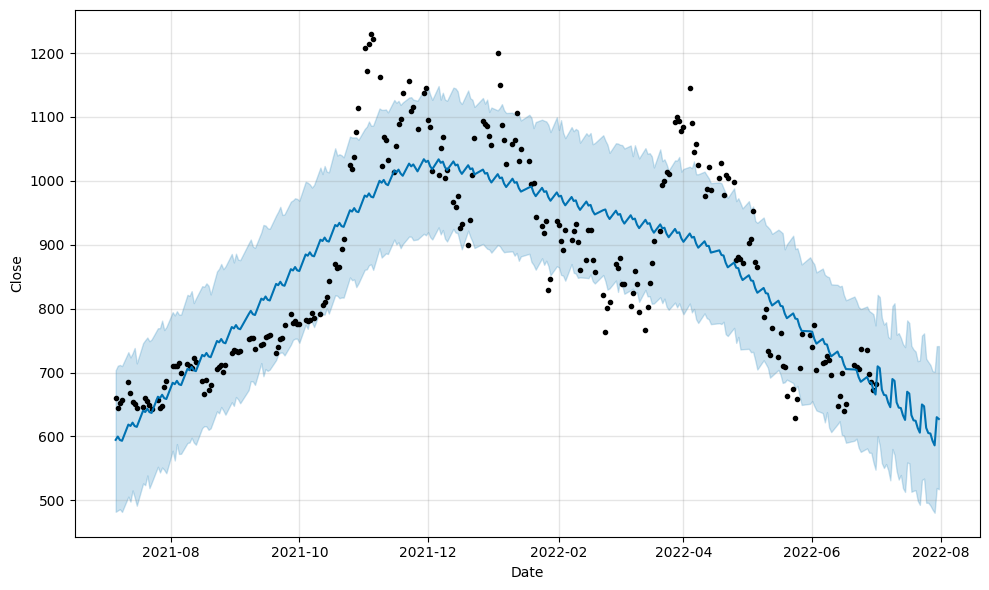

In [22]:
figure=model.plot(forecast, xlabel='Date', ylabel='Close')
# Here black dots is tthe actual price of tesla and blue is the forecasted price

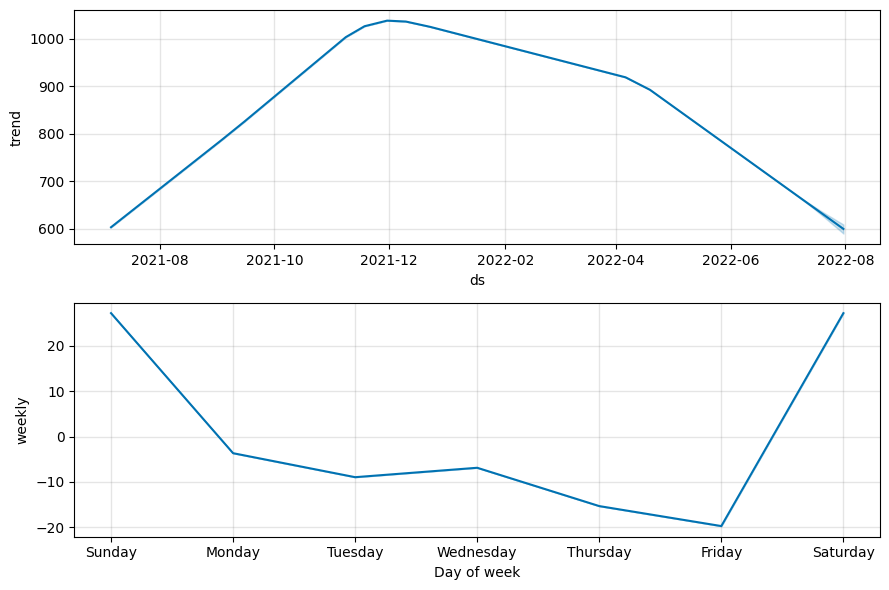

In [23]:
# Plotting weekly trend and overall trend
figure2=model.plot_components(forecast)

In [ ]:
# To download the forecasted file directly
from google.colab import files
forecast.to_csv("TESLA_stock_forecast.csv")
files.download('TESLA_stock_forecast.csv')